In [1]:
import random
import collections
import graphviz
num_nodes = 16
seed = None

In [3]:
# meaning of side
#   0 = left
#   1 = right
#   2 = up
#   3 = down
# meaning of adj[i][side]
#   0+ = index of node
#   -1 = unassigned
#   -2 = wall
#   -3 = entrance / exit
random.seed(seed)
print('seed:', seed)
seed = random.getrandbits(100)
adj = [[-1] * 4 for i in range(num_nodes)]
# adj = [[-1]*4]*num_nodes
adj[0][0] = -3 # entrance
adj[-1][1] = -3 # exit

seed: 444808175056881229562383838127


In [4]:
walls = [(i, j, k) for i in range(num_nodes) for j in range(4) for k in range(num_nodes) if adj[k][j^1] == -1]
random.shuffle(walls)
walls.sort(key = lambda x: 10 if x[0] == 0 or x[0] == num_nodes-1 or x[2] == 0 or x[2] == num_nodes-1 else 0)
# disjoint set structure
parent = [-1] * num_nodes
def find_root(idx):
    if parent[idx] < 0: return idx
    root = find_root(parent[idx])
    parent[idx] = root
    return root
def join(i, j):
    root1 = find_root(i)
    root2 = find_root(j)
    if root1 == root2: return
    if parent[root1] < parent[root2]:
        parent[root1] += parent[root2]
        parent[root2] = root1
    else:
        parent[root2] += parent[root1]
        parent[root1] = root2
def in_same(i, j):
    return find_root(i) == find_root(j)
# modified Kruskal's algorithm
for i, j, k in walls:
    if (adj[i][j] == -1 and
            adj[k][j^1] == -1 and
            not in_same(i, k)):
        join(i, k)
        adj[i][j] = k
        adj[k][j^1] = i

In [5]:
# Floyd–Warshall algorithm
dist = [[0 if i==j else num_nodes+1 for i in range(num_nodes)] for j in range(num_nodes)]
for i in range(num_nodes):
    for side in adj[i]:
        if side >= 0 and i != side:
            dist[i][side] = 1
for i in range(num_nodes):
    for j in range(num_nodes):
        for k in range(num_nodes):
            dist[j][k] = min(dist[j][k], dist[j][i] + dist[i][k])

In [6]:
dist

[[0, 3, 3, 3, 1, 4, 6, 6, 4, 5, 2, 6, 5, 2, 7, 7],
 [3, 0, 4, 2, 2, 1, 3, 3, 1, 2, 3, 3, 2, 1, 4, 4],
 [3, 4, 0, 4, 2, 5, 7, 7, 5, 6, 1, 7, 6, 3, 8, 8],
 [3, 2, 4, 0, 2, 3, 5, 5, 3, 4, 3, 5, 4, 1, 6, 6],
 [1, 2, 2, 2, 0, 3, 5, 5, 3, 4, 1, 5, 4, 1, 6, 6],
 [4, 1, 5, 3, 3, 0, 2, 4, 2, 1, 4, 4, 3, 2, 5, 3],
 [6, 3, 7, 5, 5, 2, 0, 6, 4, 1, 6, 6, 5, 4, 7, 1],
 [6, 3, 7, 5, 5, 4, 6, 0, 2, 5, 6, 2, 1, 4, 1, 7],
 [4, 1, 5, 3, 3, 2, 4, 2, 0, 3, 4, 2, 1, 2, 3, 5],
 [5, 2, 6, 4, 4, 1, 1, 5, 3, 0, 5, 5, 4, 3, 6, 2],
 [2, 3, 1, 3, 1, 4, 6, 6, 4, 5, 0, 6, 5, 2, 7, 7],
 [6, 3, 7, 5, 5, 4, 6, 2, 2, 5, 6, 0, 1, 4, 3, 7],
 [5, 2, 6, 4, 4, 3, 5, 1, 1, 4, 5, 1, 0, 3, 2, 6],
 [2, 1, 3, 1, 1, 2, 4, 4, 2, 3, 2, 4, 3, 0, 5, 5],
 [7, 4, 8, 6, 6, 5, 7, 1, 3, 6, 7, 3, 2, 5, 0, 8],
 [7, 4, 8, 6, 6, 3, 1, 7, 5, 2, 7, 7, 6, 5, 8, 0]]

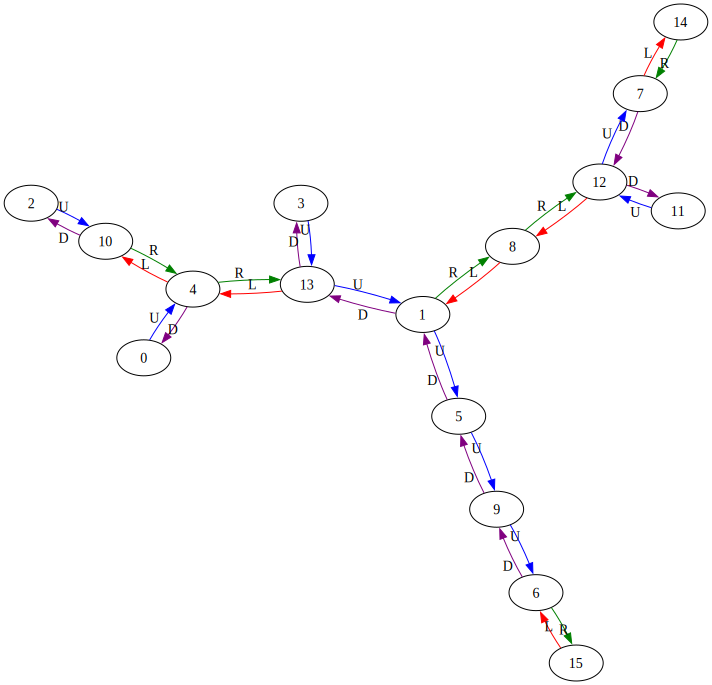

In [7]:
colors = ['red', 'green', 'blue', 'purple']
labels = ['L', 'R', 'U', 'D']
graph = graphviz.Digraph(engine='sfdp')
graph.attr(scale='1.5')
for i in range(num_nodes):
    for side in range(4):
        if adj[i][side] >= 0:
            graph.edge(str(i), str(adj[i][side]), color=colors[side], label=labels[side])
graph

In [8]:
# kinda Kruskal's algorithm? fills in remaining edges in maze
random.shuffle(walls)
# for i in range(num_nodes):
#     for j in range(num_nodes):
#         dist[i][j] += random.randrange(5)
def fill_sort_key(wall):
    # how much further away are we from the end if we take this edge
    diff = dist[wall[2]][-1] - dist[wall[0]][-1]
    return max(2,dist[wall[0]][wall[2]])-num_nodes*3 if diff > 0 else -diff
walls.sort(key = fill_sort_key)
# walls.sort(key = lambda x: x[2])
print(walls[:20])
for i, j, k in walls:
    if (adj[i][j] == -1): # and
            # adj[k][j^1] == -1):
        adj[i][j] = k
        # adj[k][j^1] = i

[(8, 2, 7), (5, 2, 8), (1, 3, 8), (8, 3, 7), (12, 3, 7), (12, 1, 14), (5, 3, 13), (13, 2, 10), (12, 0, 14), (8, 1, 11), (12, 3, 11), (6, 2, 9), (5, 1, 8), (8, 1, 12), (7, 1, 14), (4, 0, 10), (5, 0, 13), (13, 0, 4), (15, 0, 6), (1, 3, 13)]


In [9]:
parent

[3, 3, 3, -16, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [10]:
for i in range(num_nodes):
    print(i, adj[i])

0 [-3, 2, 4, 2]
1 [4, 8, 5, 13]
2 [14, 14, 10, 14]
3 [0, 10, 13, 0]
4 [10, 13, 2, 0]
5 [13, 8, 9, 1]
6 [5, 15, 9, 9]
7 [14, 14, 14, 12]
8 [1, 12, 7, 7]
9 [5, 5, 6, 5]
10 [2, 4, 2, 2]
11 [14, 14, 12, 14]
12 [8, 14, 7, 11]
13 [4, 4, 1, 3]
14 [14, 7, 14, 2]
15 [6, -3, 6, 9]


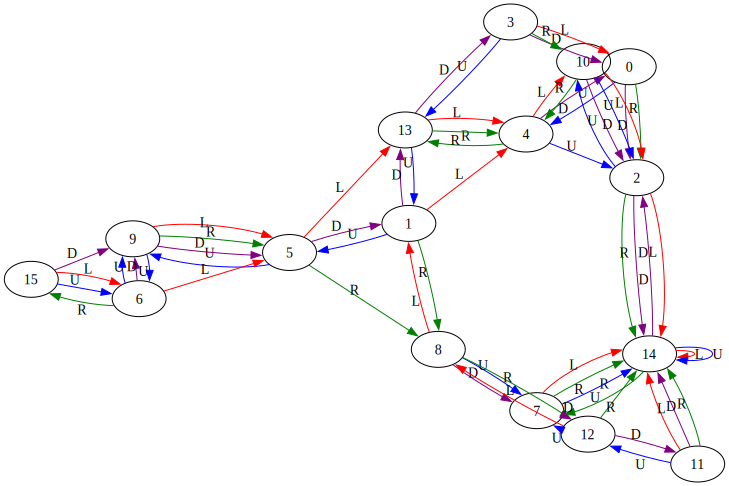

In [11]:
colors = ['red', 'green', 'blue', 'purple']
labels = ['L', 'R', 'U', 'D']
graph = graphviz.Digraph(engine='sfdp')
graph.attr(scale='1.5')
for i in range(num_nodes):
    for side in range(4):
        if adj[i][side] >= 0:
            graph.edge(str(i), str(adj[i][side]), color=colors[side], label=labels[side])
# for i in range(num_nodes):
#     for j in range(num_nodes):
#         if i < j and dist[i][j] == 1:
#             graph.edge(str(i), str(j))
# graph.node('0', pin='true', pos='0,0')
# graph.node('8', pin='true', pos='-0.3,-1')
# graph.node('9', pin='true', pos='-0.3,1')
# graph.node('14', pin='true', pos='1,0')
# graph.node('6', pin='true', pos='1,-1')
# graph.node('3', pin='true', pos='2,0')
# graph.node('11', pin='true', pos='2.3,-1')
# graph.node('12', pin='true', pos='2.3,1')
graph

In [12]:
# breadth first search
depths = [-1] * num_nodes
prev = [-1] * num_nodes
queue = collections.deque([(-1, 0)])
next_queue = collections.deque()
depth = 0
bfs = []
while queue:
    while queue:
        prev_idx, idx = queue.popleft()
        if idx < 0 or depths[idx] >= 0: continue
        bfs.append(idx)
        depths[idx] = depth
        prev[idx] = prev_idx
        next_queue.extend([(idx, adj[idx][i]) for i in range(4)])
    queue, next_queue = next_queue, queue
    next_queue.clear()
    depth += 1

In [13]:
print(depths)
print(prev)
print(bfs)

[0, 3, 1, 3, 1, 4, 6, 3, 4, 5, 2, 5, 4, 2, 2, 7]
[-1, 13, 0, 13, 0, 1, 9, 14, 1, 5, 2, 12, 7, 4, 2, 6]
[0, 2, 4, 14, 10, 13, 7, 1, 3, 12, 8, 5, 11, 9, 6, 15]


In [71]:
# intermediate = list(range(2, num_nodes))
# random.shuffle(intermediate)
# print(intermediate)
# intermediate = [0] + intermediate + [num_nodes-1]
# for idx in range(1,len(intermediate)):
#     from_idx = intermediate[idx-1]
#     to_idx = intermediate[idx]
#     walls = [i for i in range(4) if adj[from_idx][i] == -1 and adj[to_idx][i^1] == -1]
#     wall = random.choice(walls)
#     adj[from_idx][wall] = to_idx
#     adj[to_idx][wall^1] = from_idx

In [72]:
# for i in range(num_nodes):
#     for j in range(4):
#         if adj[i][j] == -1:
#             adj[i][j] = random.randrange(num_nodes)